**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.
Reanalyzing file assign.h5 for scheme TEST.
Reanalyzing file direct.h5 for scheme TEST.

Complete!
Setting iteration to iter 213.


In [2]:
total_iteration = 213

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink = 160.0

lifetime = 0.0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 501
    
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink and l[j][tau-1] >= sink:
            it[i] += wts[j]
            #print wts[j]
            for k in range(tau):
                if l[j][k] < sink and l[j][k+1] >= sink:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
                    break
            break
    print flux
    flux_array.append(flux)
    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 0.0, lifetime/(sum(it)), 1.0, 0.0
f1.close()

Setting iteration to iter 1.
0.0
Setting iteration to iter 2.
0.0
Setting iteration to iter 3.
0.0
Setting iteration to iter 4.
0.0
Setting iteration to iter 5.
1.3865779256794231e-05
Setting iteration to iter 6.
1.3865779256794231e-05
Setting iteration to iter 7.
1.3865779256794231e-05
Setting iteration to iter 8.
1.9242633480787652e-05
Setting iteration to iter 9.
2.3920416761839877e-05
Setting iteration to iter 10.
2.810956932091925e-05
Setting iteration to iter 11.
3.0730629539777776e-05
Setting iteration to iter 12.
3.380314520674286e-05
Setting iteration to iter 13.
4.060053082765789e-05
Setting iteration to iter 14.
4.503134200693533e-05
Setting iteration to iter 15.
4.85080088316323e-05
Setting iteration to iter 16.
5.042957919806099e-05
Setting iteration to iter 17.
5.056888250201125e-05
Setting iteration to iter 18.
5.148519759678812e-05
Setting iteration to iter 19.
5.479679843925316e-05
Setting iteration to iter 20.
5.958377342285726e-05
Setting iteration to iter 21.
5.9586

0.00023012206529859954
Setting iteration to iter 161.
0.00023020029941573313
Setting iteration to iter 162.
0.00023086913331494703
Setting iteration to iter 163.
0.0002320431862150978
Setting iteration to iter 164.
0.00023321016607440133
Setting iteration to iter 165.
0.00023437008701507778
Setting iteration to iter 166.
0.00023447436228179398
Setting iteration to iter 167.
0.00023450908004257743
Setting iteration to iter 168.
0.00023456619294670155
Setting iteration to iter 169.
0.0002345775676559972
Setting iteration to iter 170.
0.00023459855696483366
Setting iteration to iter 171.
0.00023596273706555108
Setting iteration to iter 172.
0.00023610727306721648
Setting iteration to iter 173.
0.00023616061503933464
Setting iteration to iter 174.
0.00023746799282158316
Setting iteration to iter 175.
0.00023880089584226206
Setting iteration to iter 176.
0.00024019217633659487
Setting iteration to iter 177.
0.00024157561494191385
Setting iteration to iter 178.
0.00024176852741471643
Setting

In [4]:
print "MFPT = ", float(tau)/flux


MFPT =  239.50827552432662


Setting iteration to iter 250.


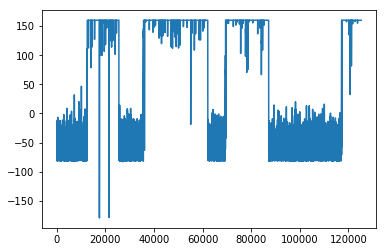

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
w.iteration = 250
final_trajectories = w.current.seg_id
traj_trace = w.trace(final_trajectories[24])
#print('What data can we access from our trace for segment {}?'.format(final_trajectories[45]))
#print(traj_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(traj_trace['pcoord'])
plt.show()
print traj_trace['pcoord']
print len(np.array(traj_trace['pcoord']))
#print traj_trace['pcoord'].shape()
#plt.plot(np.log10(traj_trace['weights']))
#plt.show()
#trajectory = traj_trace['pcoord']
#print trajectory

In [11]:
w.iteration = 1
w.current.bins
l1 = w.current.pcoord
print len(l1)
w.current

Setting iteration to iter 1.
10


['aggregate_walkers', 'auxdata', 'bins', 'color_prob_evolution', 'conditional_flux_evolution', 'direct', 'instant_matrix', 'iteration', 'matrix', 'maxweight', 'minweight', 'parent', 'parents', 'pcoord', 'rate_evolution', 'raw', 'reweight', 'seg_id', 'state_pop_evolution', 'states', 'successful_trajectories', 'summary', 'target_flux_evolution', 'total_fluxes', 'walkers', 'weights']

In [4]:
print it
f1 = open('FPTD.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.1776246629187805e-08, 1.3826093502694526e-06, 3.7681274474032623e-06, 1.3472183666790668e-05, 1.3331054547306252e-05, 4.259562391300826e-05, 2.6576861929995816e-05, 8.246303079056918e-05, 6.82439587497308e-05, 0.00011847305993286607, 0.00014089383150045525, 0.00020705130113484645, 0.00019885478670150585, 0.00034064842601099247, 0.00044508024972321144, 0.0004116296006271741, 0.0006008721335047407, 0.0006771976902249264, 0.0006306285782054651, 0.0004643954648271254, 0.0010896655616584774, 0.0008444606908223379, 0.0012993184670511322, 0.0012304659288713794, 0.001003578233848782, 0.000569793007048002, 0.001294578788351631, 0.0012238470419705498, 0.0013700325636867307, 0.001739611934290513, 0.001229496200589249, 0.0010139775221613774, 0.0011715195680565738, 0.0006450533295566203, 0.0019053250989321958, 0.0014545886848514528, 0.001609668746430988, 0.0018464023764852883, 0.001638356633722819, 0.0015077483242450695, 0.0010967827492968357, 0.0015664651

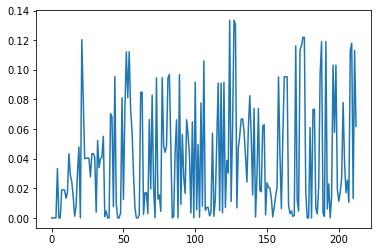

In [3]:
plt.plot(it)

In [16]:
w.iteration = 1000
sum(w.current.weights)

Setting iteration to iter 1000.


1.0

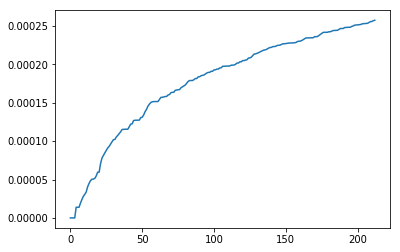

In [4]:
plt.plot(flux_array)